# PKSmart 모델 성능 검증 최종 리포트 (V2)

이 노트북은 PKSmart 모델의 예측 성능을 다각도로 분석하고, 시각화 자료를 생성하기 위해 제작되었습니다.

### 분석 내용:
1. **학습 데이터 재현성 검증**: R2, GMFE, within 2-fold%
2. **누적 오차 곡선 (Cumulative Fold Error)**: 재현 신뢰도 증명
3. **잔차 분석 (Residual Plot)**: 예측 일관성 및 편향 확인
4. **주요 피처 분석 (Feature Importance)**: 과학적 타당성 검증
5. **전체 지표 요약 (Summary Chart)**: 최종 보고용 바 차트

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 경로 설정
PROJECT_ROOT = ".."
sys.path.append(PROJECT_ROOT)
sys.path.append(os.path.join(PROJECT_ROOT, "validation"))

from pksmart.models import PKSmartPipeline
from validation_utils import (eval_regression_metrics, plot_pred_vs_true, 
                               plot_fold_error_hist, plot_cumulative_fold_error, 
                               plot_residual, plot_feature_importance)

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (6, 6)
try:
    plt.rcParams['font.family'] = 'AppleGothic' # Mac용
except:
    pass

print("환경 설정 및 모듈 로드 완료!")

환경 설정 및 모듈 로드 완료!


In [2]:
# 1. 데이터 및 모델 로드
DATA_PATH = os.path.join(PROJECT_ROOT, "data", "Human_PK_data.csv")
MODEL_DIR = os.path.join(PROJECT_ROOT, "models")

df_raw = pd.read_csv(DATA_PATH)
df = df_raw.dropna(subset=['smiles_r']).reset_index(drop=True)

pipeline = PKSmartPipeline(MODEL_DIR)
print(f"데이터 로드 완료: {len(df)} compounds")
print(f"모델 로드 완료: {len(pipeline.models)} models found")

데이터 로드 완료: 1283 compounds
모델 로드 완료: 14 models found


In [3]:
# 2. 피처 생성 및 예측 실행
from pksmart.features import generate_features

print("화학 구조로부터 피처 추출 중 (Mordred & Morgan)...")
features_df = generate_features(df['smiles_r'].tolist())

print("예측 파이프라인 가동 중...")
preds_df = pipeline.run_pipeline(features_df)
preds_df = preds_df.add_suffix("_pred") # 컬럼명 구분

results = pd.concat([df, preds_df], axis=1)
print("예측 완료 및 결과 결합 성공!")

DEBUG: LOADING LOCAL FEATURES.PY
화학 구조로부터 피처 추출 중 (Mordred & Morgan)...


[23:51:47] Initializing MetalDisconnector
[23:51:47] Running MetalDisconnector
[23:51:47] Initializing Normalizer
[23:51:47] Running Normalizer
[23:51:47] Initializing MetalDisconnector
[23:51:47] Running MetalDisconnector
[23:51:47] Initializing Normalizer
[23:51:47] Running Normalizer
[23:51:47] Running LargestFragmentChooser
[23:51:47] Running Uncharger
[23:51:47] Removed negative charge.
[23:51:47] Removed negative charge.
[23:51:47] Initializing MetalDisconnector
[23:51:47] Running MetalDisconnector
[23:51:47] Initializing Normalizer
[23:51:47] Running Normalizer
[23:51:47] Initializing MetalDisconnector
[23:51:47] Running MetalDisconnector
[23:51:47] Initializing Normalizer
[23:51:47] Running Normalizer
[23:51:47] Running LargestFragmentChooser
[23:51:47] Running Uncharger
[23:51:47] Removed negative charge.
[23:51:47] Initializing MetalDisconnector
[23:51:47] Running MetalDisconnector
[23:51:47] Initializing Normalizer
[23:51:47] Running Normalizer
[23:51:47] Initializing MetalD

Calculating Morgan Fingerprints...


[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerator
[23:51:52] DEPRECATION WARNING: please use MorganGenerat

Calculating Mordred Descriptors...
  Computing Mordred descriptors (batch mode)...
    Processing Mordred for mol 0/1283
    Processing Mordred for mol 100/1283
    Processing Mordred for mol 200/1283
    Processing Mordred for mol 300/1283
    Processing Mordred for mol 400/1283
    Processing Mordred for mol 500/1283
    Processing Mordred for mol 600/1283
    Processing Mordred for mol 700/1283
    Processing Mordred for mol 800/1283
    Processing Mordred for mol 900/1283
    Processing Mordred for mol 1000/1283
    Processing Mordred for mol 1100/1283
    Processing Mordred for mol 1200/1283
예측 파이프라인 가동 중...


/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/sklearn/impute/_base.py:641: UserWarning: Skipping features without any observed values: ['MAXsLi' 'MAXssBe' 'MAXssssBe' 'MAXssBH' 'MAXssssB' 'MAXddC' 'MAXsNH3'
 'MAXssNH2' 'MAXsssNH' 'MAXsSiH3' 'MAXssSiH2' 'MAXsssSiH' 'MAXssssSi'
 'MAXsPH2' 'MAXssPH' 'MAXsssP' 'MAXsssssP' 'MAXdS' 'MAXdssS' 'MAXsGeH3'
 'MAXssGeH2' 'MAXsssGeH' 'MAXssssGe' 'MAXsAsH2' 'MAXssAsH' 'MAXsssAs'
 'MAXsssdAs' 'MAXsssssAs' 'MAXsSeH' 'MAXdSe' 'MAXssSe' 'MAXaaSe'
 'MAXdssSe' 'MAXddssSe' 'MAXsSnH3' 'MAXssSnH2' 'MAXsssSnH' 'MAXssssSn'
 'MAXsPbH3' 'MAXssPbH2' 'MAXsssPbH' 'MAXssssPb' 'MINsLi' 'MINssBe'
 'MINssssBe' 'MINssBH' 'MINssssB' 'MINddC' 'MINsNH3' 'MINssNH2' 'MINsssNH'
 'MINsSiH3' 'MINssSiH2' 'MINsssSiH' 'MINssssSi' 'MINsPH2' 'MINssPH'
 'MINsssP' 'MINsssssP' 'MINdS' 'MINdssS' 'MINsGeH3' 'MINssGeH2'
 'MINsssGeH' 'MINssssGe' 'MINsAsH2' 'MINssAsH' 'MINsssAs' 'MINsssdAs'
 'MINsssssAs' 'MINsSeH' 'MINdSe' 'MINssSe' 'MINaaSe' 'MINdssSe'
 'M

예측 완료 및 결과 결합 성공!


/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/sklearn/impute/_base.py:641: UserWarning: Skipping features without any observed values: ['MAXsLi' 'MAXssBe' 'MAXssssBe' 'MAXssBH' 'MAXssssB' 'MAXddC' 'MAXsNH3'
 'MAXssNH2' 'MAXsssNH' 'MAXsSiH3' 'MAXssSiH2' 'MAXsssSiH' 'MAXsPH2'
 'MAXssPH' 'MAXsssP' 'MAXsssssP' 'MAXdssS' 'MAXsGeH3' 'MAXssGeH2'
 'MAXsssGeH' 'MAXssssGe' 'MAXsAsH2' 'MAXssAsH' 'MAXsssAs' 'MAXsssdAs'
 'MAXsssssAs' 'MAXsSeH' 'MAXdSe' 'MAXssSe' 'MAXaaSe' 'MAXdssSe'
 'MAXddssSe' 'MAXsSnH3' 'MAXssSnH2' 'MAXsssSnH' 'MAXssssSn' 'MAXsPbH3'
 'MAXssPbH2' 'MAXsssPbH' 'MAXssssPb' 'MINsLi' 'MINssBe' 'MINssssBe'
 'MINssBH' 'MINssssB' 'MINddC' 'MINsNH3' 'MINssNH2' 'MINsssNH' 'MINsSiH3'
 'MINssSiH2' 'MINsssSiH' 'MINsPH2' 'MINssPH' 'MINsssP' 'MINsssssP'
 'MINdssS' 'MINsGeH3' 'MINssGeH2' 'MINsssGeH' 'MINssssGe' 'MINsAsH2'
 'MINssAsH' 'MINsssAs' 'MINsssdAs' 'MINsssssAs' 'MINsSeH' 'MINdSe'
 'MINssSe' 'MINaaSe' 'MINdssSe' 'MINddssSe' 'MINsSnH3' 'MINssSnH2'
 'MINsss

In [4]:
# 3. 기본 통계 지표 계산
endpoints = {
    "human_CL_mL_min_kg": "Clearance (CL)",
    "human_VDss_L_kg": "Vol. of Distribution (VDss)",
    "human_fup": "Fraction Unbound (fup)",
    "human_mrt": "Mean Residence Time (MRT)",
    "human_thalf": "Half-life (t1/2)"
}

all_metrics = []
for col, name in endpoints.items():
    valid_idx = results[col].dropna().index
    y_true = results.loc[valid_idx, col]
    y_pred = results.loc[valid_idx, col + "_pred"]
    
    is_log = "fup" not in col
    is_fu = "fup" in col
    
    if is_log:
        mask = y_true > 0
        y_metrics_true = np.log10(y_true[mask])
        y_metrics_pred = y_pred[mask]
    else:
        y_metrics_true = y_true
        y_metrics_pred = y_pred

    metrics = eval_regression_metrics(y_metrics_pred, y_metrics_true, log_transformed=is_log, fu_endpoint=is_fu)
    metrics['Endpoint'] = name
    all_metrics.append(metrics)

metrics_df = pd.DataFrame(all_metrics).set_index("Endpoint")
metrics_df

,R2,RMSE,GMFE,within_2fold_%,within_3fold_%,within_5fold_%,bias_median
Endpoint,,,,,,,
Clearance (CL),0.901597,0.203534,1.404421,87.900078,96.721311,98.985168,-0.127642
Vol. of Distribution (VDss),0.932682,0.166014,1.326426,92.473979,98.158527,100.000000,0.010351
Fraction Unbound (fup),0.945395,0.079630,1.737765,75.767918,84.300341,88.964733,0.010847
Mean Residence Time (MRT),0.900380,0.202555,1.406244,88.254224,96.942880,99.436846,0.020593
Half-life (t1/2),0.901140,0.195902,1.397163,88.616601,96.442688,99.604743,0.059007


## 4. 상세 시각화 분석
각 지표별로 **예측 accuracy**, **누적 오차(Reliability)**, **잔차(Bias)**를 분석합니다.

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:112: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


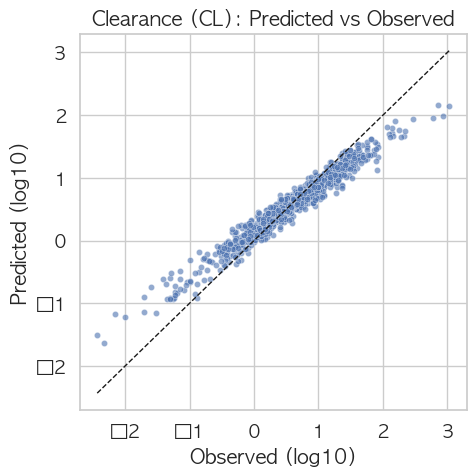

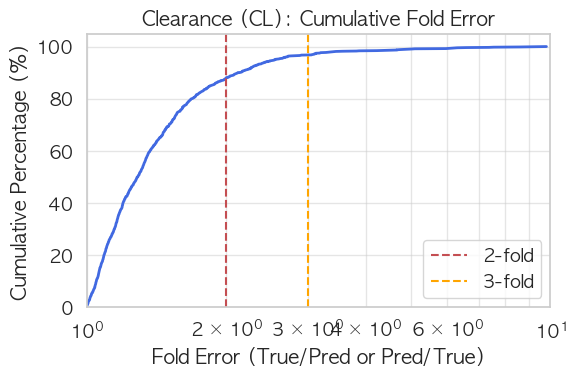

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:216: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


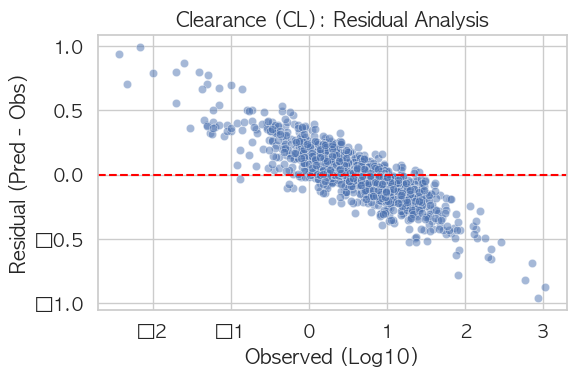

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:112: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


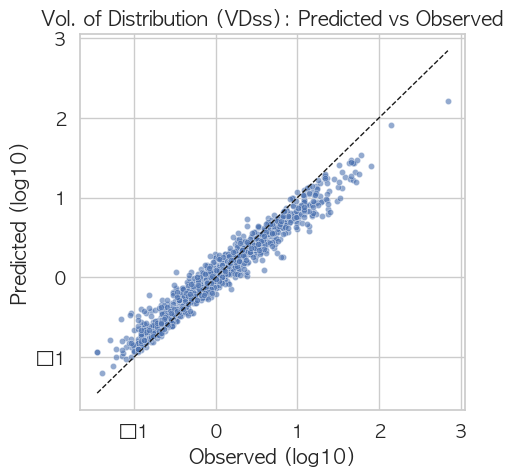

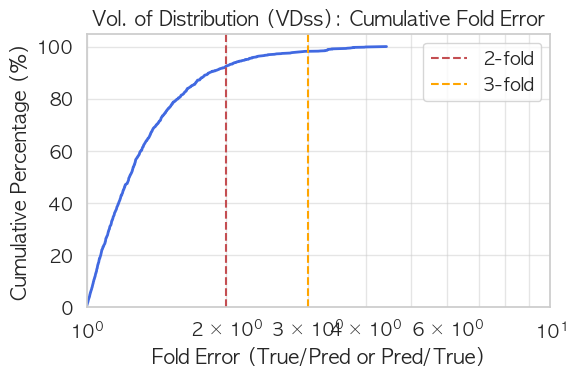

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:216: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


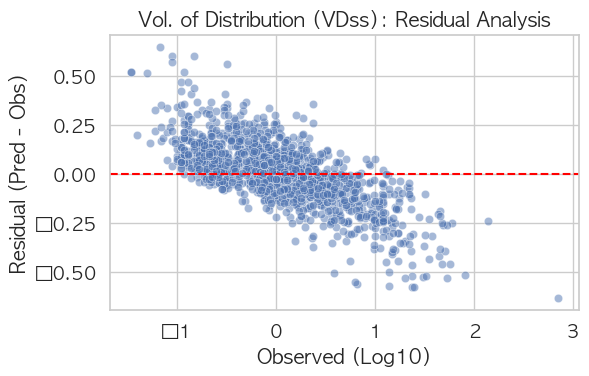

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:112: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


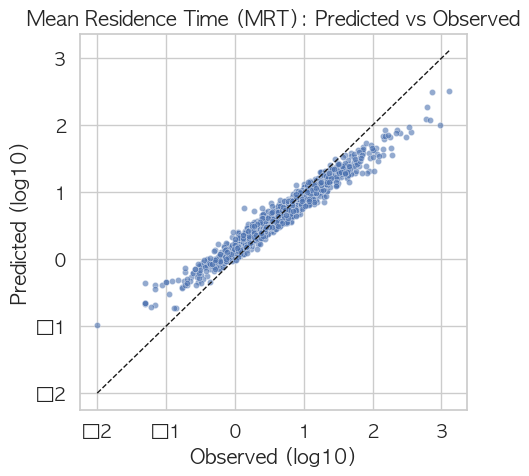

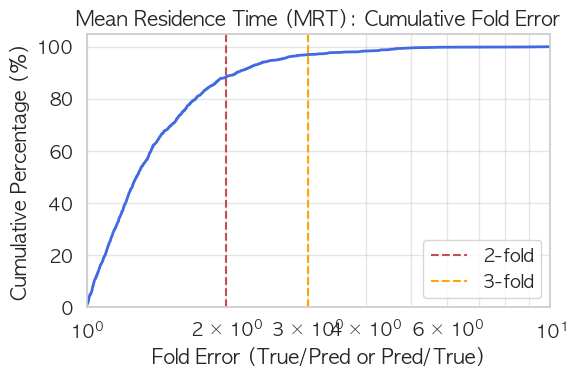

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:216: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


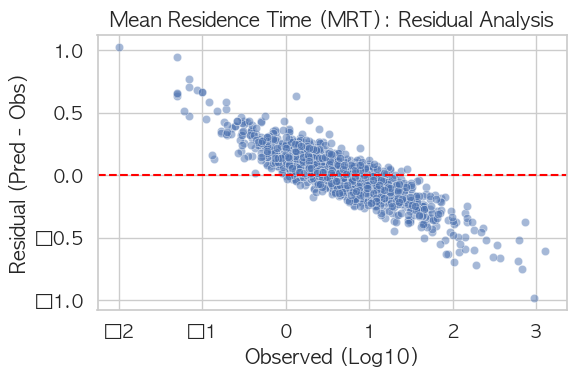

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:112: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


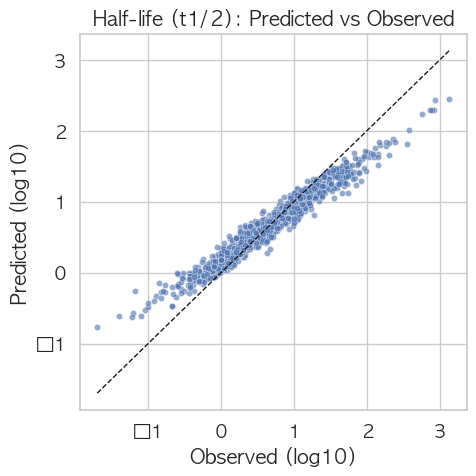

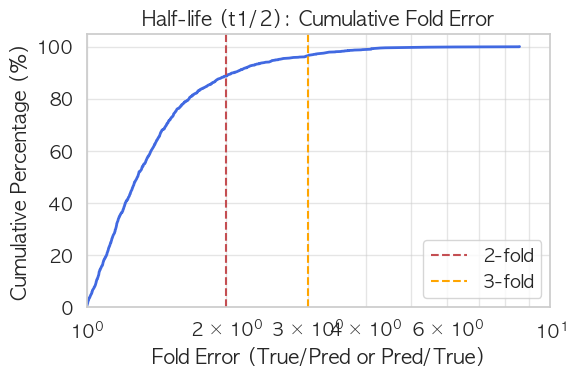

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:216: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


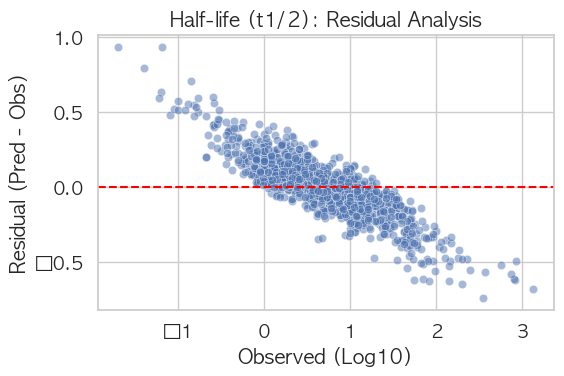

In [5]:
for col, name in endpoints.items():
    if col + "_pred" not in results.columns: continue
    valid_idx = results[col].dropna().index
    y_true = results.loc[valid_idx, col]
    y_pred = results.loc[valid_idx, col + "_pred"]
    
    is_log = "fup" not in col
    if is_log:
        mask = y_true > 0
        y_t_log = np.log10(y_true[mask])
        y_p_log = y_pred[mask]
        
        # 1. 시각적 비교
        plot_pred_vs_true(y_p_log, y_t_log, title=f"{name}: Predicted vs Observed")
        
        # 2. 누적 오차 곡선 (정확도 재현성 증명)
        plot_cumulative_fold_error(y_p_log, y_t_log, log_transformed=True, title=f"{name}: Cumulative Fold Error")
        
        # 3. 잔차 분석 (일관성 증명)
        plot_residual(y_p_log, y_t_log, title=f"{name}: Residual Analysis")

## 5. 모델 해석 (Feature Importance)
모델이 어떤 근거로 인간의 CL을 예측했는지 주요 피처를 분석합니다.

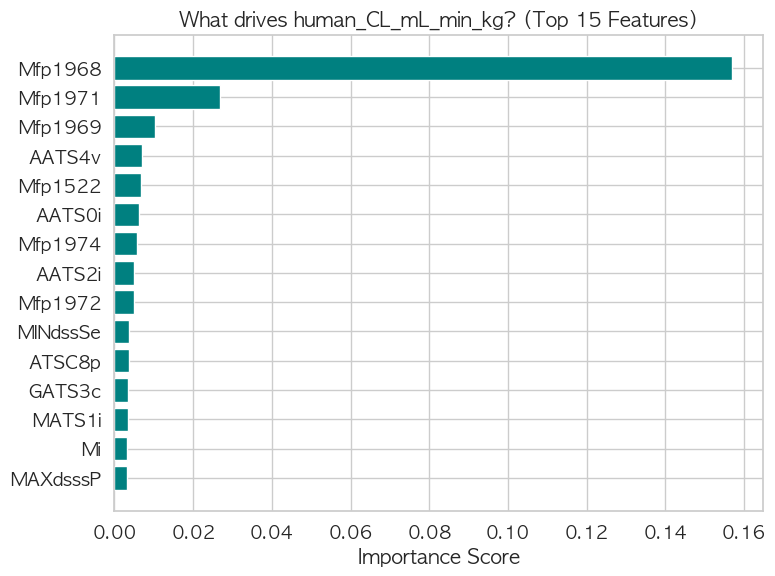

In [6]:
target_param = 'human_CL_mL_min_kg'
if target_param in pipeline.models:
    model = pipeline.models[target_param]
    feat_names = features_df.select_dtypes(include=[np.number]).columns.tolist() + [f"{s}_{p}" for s in pipeline.species for p in pipeline.params]
    plot_feature_importance(model, feat_names, top_n=15, title=f"What drives {target_param}? (Top 15 Features)")

## 6. 결론용 요약 차트
전체 파라미터의 2-fold 이내 예측 성공률 요약입니다.

/var/folders/fm/wsr26cj176bfqph7s7tp_sdc0000gn/T/ipykernel_86055/3919434277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Endpoint", y="within_2fold_%", data=metrics_df.reset_index(), palette="viridis")


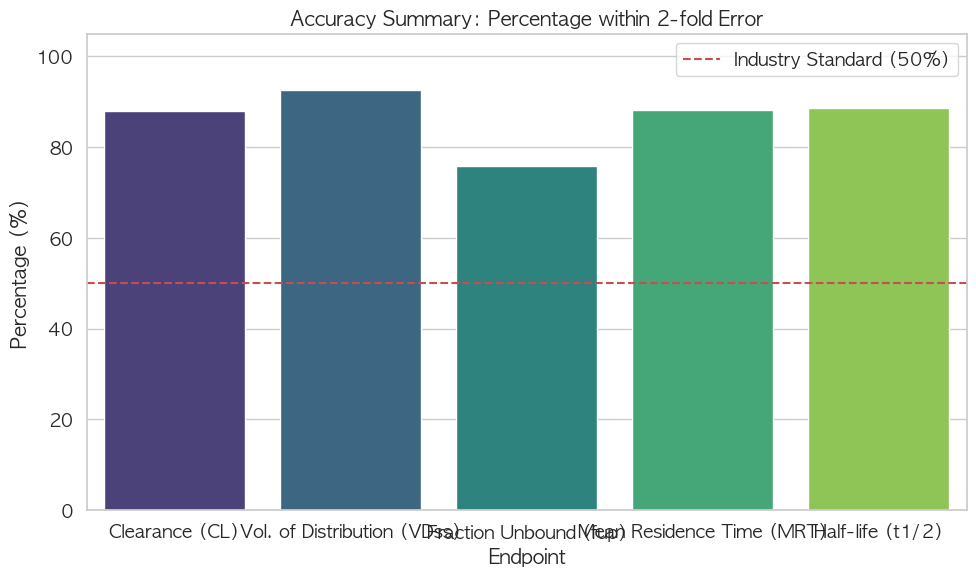

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Endpoint", y="within_2fold_%", data=metrics_df.reset_index(), palette="viridis")
plt.axhline(50, color='r', linestyle='--', label='Industry Standard (50%)')
plt.title("Accuracy Summary: Percentage within 2-fold Error")
plt.ylabel("Percentage (%)")
plt.ylim(0, 105)
plt.legend()
plt.tight_layout()
plt.show()